# This notebook is a helpful guide for Neutron Star 3D thermal evolution code

$1. \textbf{Description:}$

The code is written using C++ programming language.

Two additional libraries are required:

1) Deal II library (is used as the main instrument for calculations in the 3D code) [ see http://dealii.org/download.html ]

2) GSL library (it contatins 1d- and 2d-interpolation routines that are used in the 3D code) [ see https://www.gnu.org/software/gsl/ ]

Additionally, to visualize 3d output (e.g. Temperature as a function of x,y,z) one may require Visit visualization program [ see https://wci.llnl.gov/simulation/computer-codes/visit/ ]

$2. \textbf{Code}$  $\textbf{structure:}$

-------------------------

main.cc (here we start the simulation process)

constants.h (constants used in the code)

control_panel.h (parameters of the simulation)

interpolation.h, interpolation.cc (interpolation routines)

loaddata.h, loaddata.cc (initial data loading and interpolation splines building)

FEM_heatequation.h, FEM_heatequation.cc (solving the equation of heat diffusion, outputting data)

-------------------------

There is a folder "datafiles", which consists of the initial data files. 

To get neutrino emissivity $Q$, heat capacity $C$, thermal conductivity $\kappa$ as functions of local temperature $T$ and density $\rho$ we use the following files:

file1.dat (Local temperatures)

file2.dat (Densities)

file3.dat (Neutrino emissivity table corresponding to the densities and temperatures in the above two files)

file4.dat (Heat capacity table)

file5.dat (Thermal conductivity table)

-------------------------

Relation between internal temperature $T_{i}$ and external (surface) temperature $T_{e}$ is extracted from a tite.dat file. Current version of the file is computed for $1.4M_{\odot}$ NS mass, envelope of Fe and boundary density $\rho_{b} = 10^{9}$ g cm$^{-3}$

-------------------------

We currently use BSK21 equation of state and NS mass $1.40 M_{\odot}$

$3. \textbf{Code}$ $\textbf{output:}$

As of July 15, the code outputs cooling curves $T_{s}^{\infty}(t)$ and $T_{i}(t)$, which are saved in a "cooling_curve.dat" file. It also outputs snapshots $T(r)$ at thirteen different time steps from $10^{-7}$ to $10^{6}$ years. The data is saved in .dat and .vtk files in an "output" folder.

Let's see how the current version of the 3d code works. We would like to compare the results of the 3d code with the cooling curves of our 1d code in python for the same simulation parameters. To do this, we use 1d approximation (i.e. spherical symmetry) in the 3d code, where there is only one "effective" variable -- radial coordinate.

If there is a spherical symmetry, it is computationally ineffective to model thermal evolution of a neutron star in 3D over the whole star domain. To avoid this, we create a huper rectancle, which is stretched along the x axis. We additionally shrink it along the y and z axes, so that for smaller x values the cross-section in the xy-plane is smaller and for larger x it is greater (see the last picture of this notebook). We use the shrinked huper rectangle as the main domain, where the heat conduction equation is being solved. One can see, that this approach is equivalent to solving the heat equation on the whole hyper shell.

Below we plot the cooling curves $T_{s}^{\infty}(t)$ of the 3d code in 1d approximation and of the 1d code in python.

In [3]:
# loading necessary libraryes

import numpy as np
import matplotlib.pylab as plt
from matplotlib.ticker import AutoMinorLocator
from scipy import interpolate

In [4]:
# ajusting plot styles

%matplotlib notebook

def plot_style(xticks=5,yticks=5):

    global ax
    
    plt.rc('text', usetex=True)
    #plt.rcParams['mathtext.fontset'] = 'cm'
    #plt.rcParams['mathtext.rm'] = 'serif'
    plt.rcParams.update({'figure.autolayout': True})
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['axes.linewidth'] = 2
    plt.rcParams['figure.figsize'] = 8, 7.5

    fig,ax = plt.subplots()
    x_minor_locator = AutoMinorLocator(xticks)
    y_minor_locator = AutoMinorLocator(yticks)
    plt.tick_params(which='both', width=1.7)
    plt.tick_params(which='major', length=9)
    plt.tick_params(which='minor', length=5)
    ax.xaxis.set_minor_locator(x_minor_locator)
    ax.yaxis.set_minor_locator(y_minor_locator)
    ax.tick_params(axis='both', which='both', pad=8, left='on', right='on',top='on',bottom='on')

    plt.rcParams['lines.linewidth'] = 1.0
    plt.rcParams['lines.dashed_pattern'] = [6, 6] 
    plt.rcParams['lines.dashdot_pattern'] = [3, 5, 1, 5]
    plt.rcParams['lines.dotted_pattern'] = [1, 3]
    plt.rcParams['lines.scale_dashes'] = False
    plt.rcParams['errorbar.capsize'] = 6


<IPython.core.display.Javascript object>


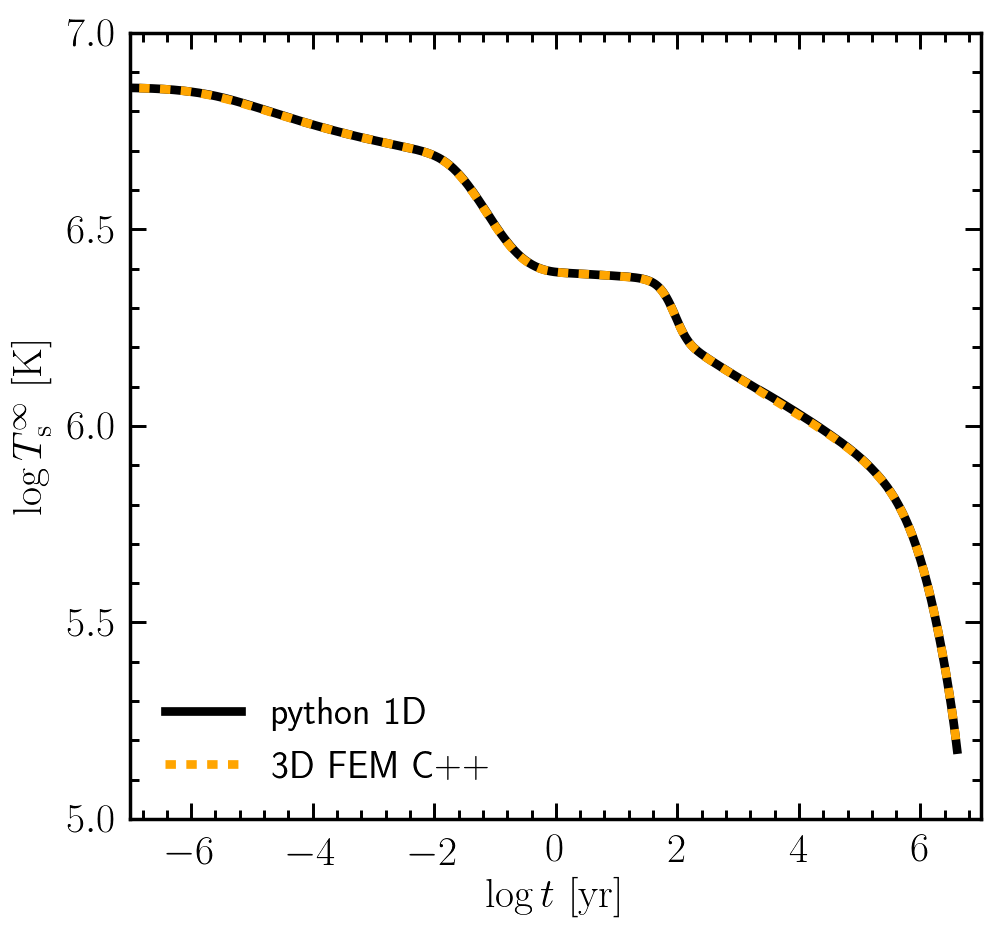

In [6]:
plot_style()

data_1d = np.loadtxt('python_1d_cooling_curve.dat')
data_3d = np.loadtxt('cooling_curve.dat')

xx = np.array([-8,-6,-4,-2,0,2,4,6,8])
yy = np.array([5,5.5,6,6.5,7])

plt.ylabel('$\\rm log \\thinspace $$T^{\infty}_{\\rm s} \\thinspace  \\thinspace \\rm [K]$',fontsize=24)
plt.xlabel('$\\rm log \\thinspace $$t \\thinspace \\thinspace  \\rm [yr]$',fontsize=24)

plt.yticks(yy, fontsize=24)
plt.xticks(xx, fontsize=24)

plt.ylim(5,7)
plt.xlim(-7,7)

plt.plot(np.log10(data_1d[:,1]) ,np.log10(data_1d[:,0]), 'black',lw=5, label='python 1D')
plt.plot(np.log10(data_3d[:,0]) ,np.log10(data_3d[:,2]),'--', color='orange',lw=5, label='3D FEM C++')

plt.legend(loc='lower left', fontsize=22,frameon=False)

We see that these two curves are nearly identical, which implies that the 3d code works fine.

Now let's compare the temperature profiles of the star $\tilde{T} = Te^{\Phi}(r)$ as functions of time.

<IPython.core.display.Javascript object>


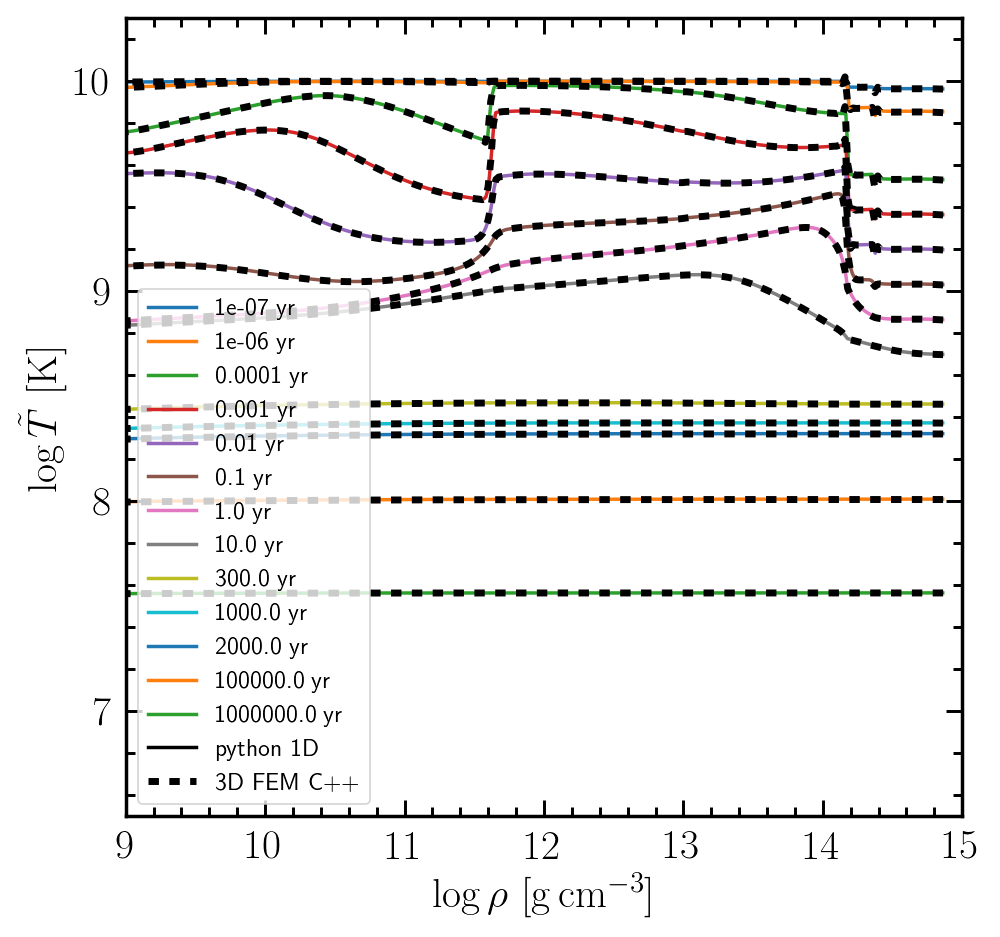

output/temperature_profile_0.dat
output/temperature_profile_1.dat
output/temperature_profile_2.dat
output/temperature_profile_3.dat
output/temperature_profile_4.dat
output/temperature_profile_5.dat
output/temperature_profile_6.dat
output/temperature_profile_7.dat
output/temperature_profile_8.dat
output/temperature_profile_9.dat
output/temperature_profile_10.dat
output/temperature_profile_11.dat
output/temperature_profile_12.dat


In [12]:
_star_model = np.loadtxt('datafiles/BSK21_1.40.dat', skiprows=1)
_rho = interpolate.interp1d(np.log(_star_model[:, 1] * 1e5), np.log(_star_model[:, 3]),
                            kind='linear',fill_value='extrapolate')

def rho(a):  # density(radius)
    return np.exp(_rho(np.log(a)))

plot_style()

data_profile = np.loadtxt('python_1d_temperature_profiles.dat')
times = np.array([1.e-7, 1.e-6, 1e-4, 1.e-3, 1.e-2, 1.e-1, 1.e0, 1.e1, 3.e2, 1.e3, 2.e3, 1.e5, 1.e6])

for i in range(1,14):
    name = 'output/temperature_profile_' + str(i-1) + '.dat'
    print(name)
    asd = np.loadtxt(name)
    plt.plot(np.log10(rho(asd[:,0][np.argsort(asd[:,0])])), 
             np.log10(asd[:,1][np.argsort(asd[:,0])]),'k--', lw=4, zorder=2)
    plt.plot(np.log10(data_profile[:,0]), np.log10(data_profile[:,i]),lw=2, zorder=1,label=str(times[i-1]) + ' yr')
    
xx = np.array([9,10,11,12,13,14,15])
yy = np.array([6,7,8,9,10])

plt.ylabel('$\\rm log \\thinspace $$\\tilde{T} \\thinspace  \\thinspace \\rm [K]$',fontsize=24)
plt.xlabel('$\\rm log \\thinspace $$\\rho \\thinspace \\thinspace  \\rm [g \\thinspace cm^{-3}]$',fontsize=24)

plt.yticks(yy, fontsize=24)
plt.xticks(xx, fontsize=24)

plt.plot([10,10],[10,10],'k-', lw=2,label='python 1D')
plt.plot([10,10],[10,10],'k--', lw=4,label='3D FEM C++')

plt.ylim(6.5,10.3)
plt.xlim(9,15)

plt.legend(loc='lower left', fontsize=14)

We find a wonderful agreement again.

Finally, let's take a look at the huperrectangle domain

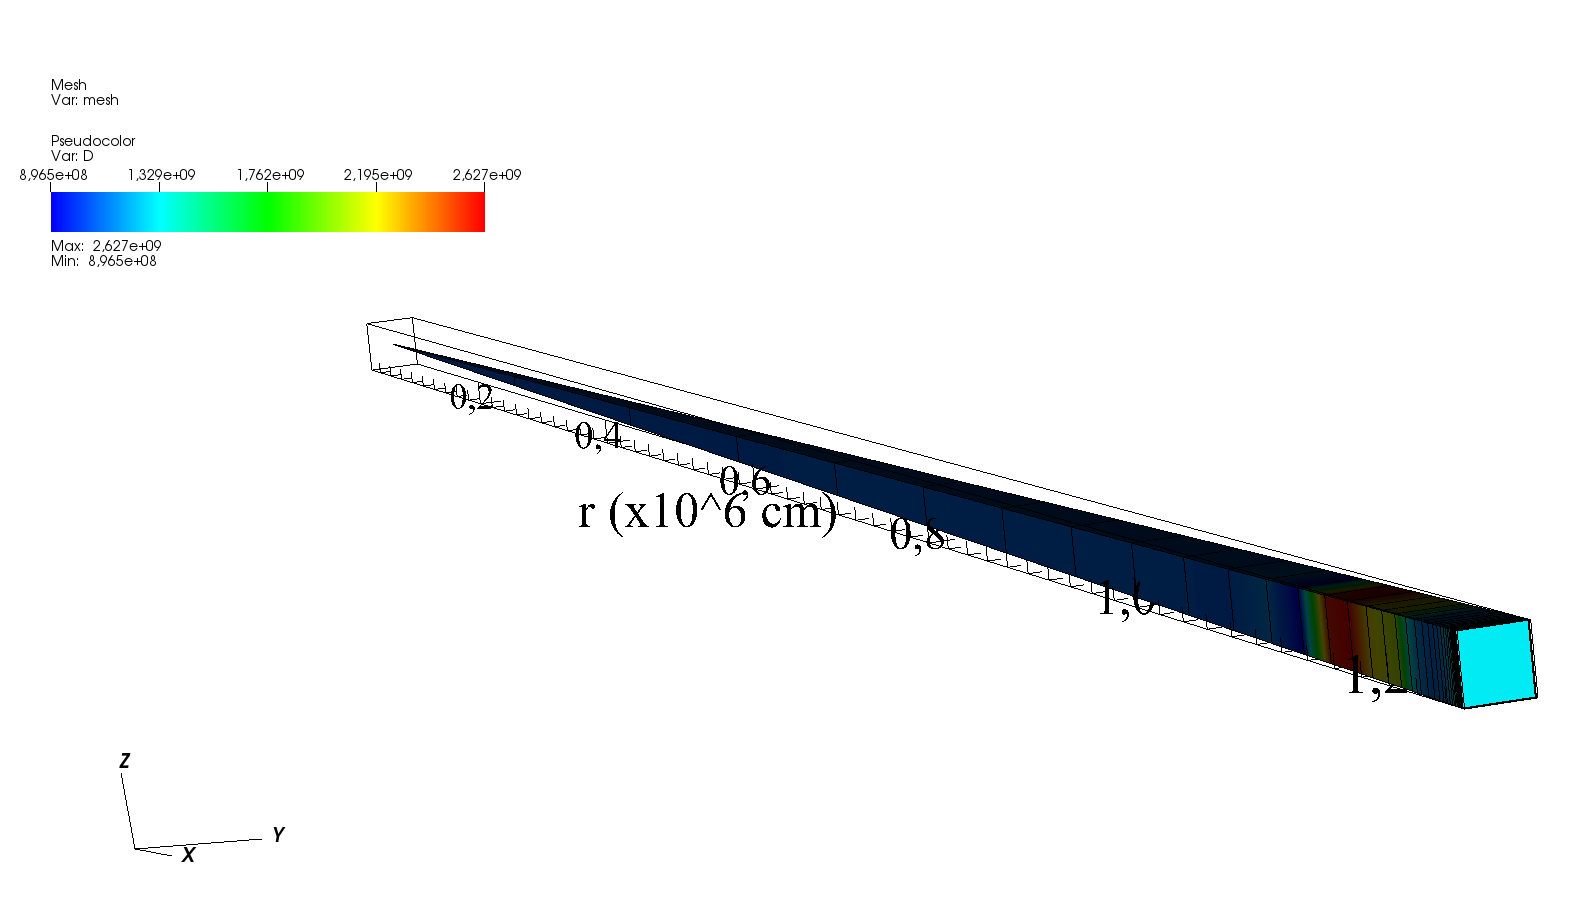

In [14]:
from IPython.display import Image
Image("scr_hyper_rectangle.png")